In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
                   

In [3]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"

In [4]:
!wget $data

--2022-09-20 12:55:59--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2022-09-20 12:55:59 (19.7 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [5]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


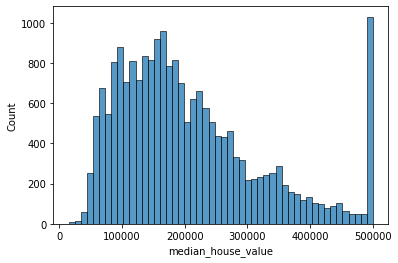

In [6]:
sns.histplot( df.median_house_value, bins=50)

In [7]:
del df["ocean_proximity"]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train

(4128, 4128, 12384)

In [10]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [11]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [17]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [12]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [15]:
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

In [16]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


In [17]:
df_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [18]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


In [19]:
df_train_0 = df_train.fillna(value=0).copy()
df_train_0.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,0.0,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,0.0,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,0.0,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,0.0,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,0.0,1063.0,428.0,3.7250


In [69]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [70]:
base = ["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]

In [112]:
x_train_0 = df_train_0[base].values
w0, w = train_linear_regression(x_train_0, y_train)
y_pred= w0 + x_train_0.dot(w)

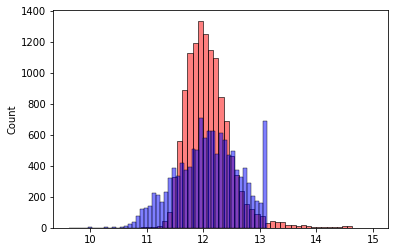

In [113]:
sns.histplot(y_pred, color = "red", alpha = 0.5, bins=50)
sns.histplot(y_train, color = "blue", alpha = 0.5, bins=50)

In [115]:
x_val = df_val[base].values
w0, w = train_linear_regression(x_val, y_val)
y_pred_val = w0 + x_val.dot(w)

In [117]:
def rmse(y, y_pred_val):
    error = y_pred_val - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [118]:
rmse(y_val, y_pred_val)

0.389086909592112

In [160]:
rmse_num= round(0.389086909592112, 2)
rmse_num

0.39

In [43]:
df_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,12384.000000,12384.000000,12384.000000,12384.000000,12177.000000,12384.000000,12384.000000,12384.000000
mean,-119.555670,35.610346,28.699855,2619.001453,533.480332,1413.292151,495.653666,3.871533
std,1.997588,2.130254,12.643342,2193.231114,422.223754,1115.069002,381.551044,1.891883
min,-124.350000,32.540000,1.000000,2.000000,2.000000,6.000000,2.000000,0.499900
25%,-121.780000,33.930000,18.000000,1441.000000,295.000000,781.000000,278.000000,2.566350
50%,-118.490000,34.250000,29.000000,2116.500000,431.000000,1159.000000,406.000000,3.547500
75%,-118.000000,37.710000,37.000000,3124.500000,641.000000,1706.000000,600.000000,4.742600
max,-114.490000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100


In [130]:
#where value is mean of total_bedrooms
df_train_avg = df_train.fillna(value=round(533.480332, 2)).copy() 
x_train_avg = df_train_avg[base].values

In [143]:
w0, w = train_linear_regression(x_train_avg, y_train)
y_pred_avg = w0 + x_train_avg.dot(w)

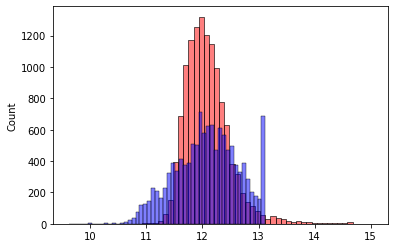

In [144]:
sns.histplot(y_pred_avg, color = "red", alpha = 0.5, bins=50)
sns.histplot(y_train, color = "blue", alpha = 0.5, bins=50)

In [145]:
x_val = df_val[base].values
w0, w = train_linear_regression(x_val, y_val)
y_pred_val = w0 + x_val.dot(w)


In [146]:
def rmse(y, y_pred_val):
    error = y_pred_val - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [157]:
rmse(y_train, y_pred_avg)


0.39570609087542225

In [159]:
rmse_num= round(0.39570609087542225, 2)
rmse_num

0.4

In [161]:
def train_linear_regression_reg(X, y, r=0.000001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [163]:
x_train_0 = df_train_0[base].values
w0, w = train_linear_regression(x_train_0, y_train)
y_pred= w0 + x_train_0.dot(w)

x_val = df_val[base].values
w0, w = train_linear_regression(x_val, y_val)
y_pred_val = w0 + x_val.dot(w)

rmse(y_val, y_pred_val)


0.389086909592112

In [164]:

def train_linear_regression_reg(X, y, r=10):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [165]:
x_train_0 = df_train_0[base].values
w0, w = train_linear_regression(x_train_0, y_train)
y_pred= w0 + x_train_0.dot(w)

x_val = df_val[base].values
w0, w = train_linear_regression(x_val, y_val)
y_pred_val = w0 + x_val.dot(w)

rmse(y_val, y_pred_val)


0.389086909592112